# Simon's Algorithm

1. [Simon's Algorithm](#simon) 
2. [The Algorithms so far](#alg)
3. [C<sup>n</sup>NOT decomposition](#decomp)

## Simon's Algorithm <a id='simon'></a>

### The problem

Let $f$ be an oracle $f:x \in \{0,1\}^n \rightarrow \{0,1\}^n$, that guaranteis $f$ to be either one-to-one($1:1$) or two-to-one (2:1), where:
* a one-to-one function:maps one unique input to every unique output, e.g. $f(1) \rightarrow 1, \quad f(2) \rightarrow 2, \quad f(3) \rightarrow 3, \quad f(4) \rightarrow 4$
* and a two-to-one function maps two inputs to every unique output, e.g. $f(1) \rightarrow 1, \quad f(2)\rightarrow 2, \quad f(3)\rightarrow 1, \quad f(4)\rightarrow 2 \quad$

To find if the function is one-to-one or two-to-one, one needs to express this guarantee in terms of a secret bit string $s$. For some $s \in \{0,1\}^n$, for all $x_1, x_2 \in \{0,1\}^n$,

$ f(x_1)=f(x_2)$ if and only if $x_1 \otimes x_2\in \{0^n,s\}$

where $\otimes$ denotes a bitwise XOR. 

Note that $a\otimes b =0^n$ if and only if $a=b$, 
and for $x_1$ and $s$ in $x_1 \otimes x_2 =s$ , $x_2$ is unique (not equal to $x_1$) if and only if $s \neq 0^n$. 
Therefore, $f$ is two-to-one when $s\neq 0^n$, and one-to-one when $s=0^n$. 

Morever, $x_1 \otimes x_2=s$ implies $x_2= s \otimes x_1$, so $f$ is periodic: $f(x_1)=f(x_2) = f(x_1\otimes s)$ 

### The classical solution

In the classical solution all we can do is to check the values of $x$ until we find a repeated output, i.e. $f(x_i) =f(x_j)$, which allows to calculate $s$. 

After we called the function $m$ times, we compared $m(m-1)/2$ pairs. 

One needs $\frac{1}{2} m(m-1) \sim 2^n$ to ensure a reasonable chance of success. Therefore the complexity is exponential in the number of bits $n$, i.e. $m=O(2^{\frac{n}{2}})$.

### The quantum solution

![Simon](https://qiskit.org/textbook/ch-algorithms/images/simon_steps.png)

1. Two n-qubit input registers are initialized to the zero state: 

$$|\psi_1\rangle=|0\rangle\otimes n|0\rangle\otimes n$$

2. Apply a Hadamard transform to the first register: 

$$|\psi_2⟩=\frac{1}{\sqrt{2^n}}\sum_{x\in\{0,1\}^n}|x\rangle|0\rangle^{\otimes n}$$

3. Apply the query function $Q_f$:
$$|\psi_3\rangle=\frac{1}{\sqrt{2^n}}\sum_{x\in\{0,1\}^n}{|x\rangle|f(x)\rangle}$$

4. Measure the second register. A specific value of $f(x)$ will be observed. Because of the setting of the problem, the observed value $f(x)$ could correspond to two possible inputs: $x$ and $y=x\otimes b$. Therefore the first register becomes: 
$$|\psi_4⟩=\frac{1}{\sqrt{2}}(|x\rangle+|y\rangle)$$
where we omitted the second register since it has been measured.

5. Apply Hadamard on the first register: 
$$|\psi_5⟩=\frac{1}{\sqrt{2^{n+1}}}\sum_{z\in\{0,1\}^n}{[(−1)^{x\cdot z}+(−1)^{y\cdot z}]|z\rangle}$$

6. Measuring the first register will give an output only if: 
$$(−1)x\cdot z=(−1)y\cdot z$$
which means: 
$$x\cdot z=y\cdot z $$
$$x\cdot z=(x\otimes b)\cdot z$$
$$x\cdot z=x\cdot z\otimes b\cdot z$$
$$b\cdot z=0 (\mod 2)$$ 

A string $z$ will be measured, whose inner product with $b=0$. Thus, repeating the algorithm $ \approx n$ times, we will be able to obtain $n$ different values of $z$ and the following system of equation can be written: 
$$b\cdot z_1=0$$
$$b\cdot z_2=0$$
$$...$$
$$b\cdot z_n=0$$ 
From which $b$ can be determined, for example, by Gaussian elimination. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile

from qiskit.tools.visualization import plot_histogram

# IBMQ.load_account()

import math
from math import pi

<div class="alert alert-block alert-warning">
    
**Exercise** Implement Simon's algorithm for $n = 2$ and $s = 11$
    
</div>

Two n-qubit input registers are initialized to the zero state: 
$$ |\psi_1 \rangle = |0\rangle ^{\otimes n}|0\rangle ^{\otimes n} = |00\rangle_1 |00\rangle_2 $$

In [11]:
# Simon's algorithm for n=2 and s=11
# s is the hidden string
# n is the number of qubits

qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr)

 Apply a Hadamard transform to the first register: 
 $$ |\psi_2 \rangle = \frac{1}{\sqrt{2^n}} \sum _{x \in \{0,1\}^n } |x\rangle|0\rangle ^{\otimes n}$$
 
 $$\frac{1}{\sqrt{2}} ( |00\rangle_1 + | 01\rangle_1 + |10\rangle_1 + |11\rangle_1 )|00\rangle_2$$

In [12]:
qc.h(qr[0:2])

00|00 + 01|00 + 10|00 + 11|00
00|00 + 01|11 + 10|11 + 11|00

Appy oracle:
 $$ |\psi_3 \rangle = \frac{1}{\sqrt{2^n}} \sum _{x \in \{0,1\}^n } |x\rangle|f(x)\rangle $$
 
 
 $$\frac{1}{2} ( |00\rangle_1| 00\rangle_2 + | 01\rangle_1 |11\rangle_2 + |10\rangle_1|11\rangle_2 +| 11\rangle |00\rangle_2)$$

In [13]:
qc.barrier()
# If q0=0 do nothing else if q0=1 apply X gate
qc.cx(qr[0], qr[2])
qc.cx(qr[0], qr[3])
# If q1=0 do nothing else if q1=1 apply X gate
qc.cx(qr[1], qr[2])
qc.cx(qr[1], qr[3])
qc.barrier()

Measure the second register. 

$$ |\psi_4 \rangle = \frac{1}{\sqrt{2}}(|x\rangle + |y\rangle )$$

For instance, if the measument is $11$ then:
 $$\frac{1}{\sqrt{2}} ( |01 \rangle_1 + |10 \rangle_1)$$

In [14]:
qc.measure(qr[2:4], cr[2:4])

Measuring the first register

$$(-1)^{x \cdot z} = (-1)^{y \cdot z}$$

In [15]:
qc.h(qr[0:2])

In [16]:
qc.measure(qr[0:2], cr[0:2])

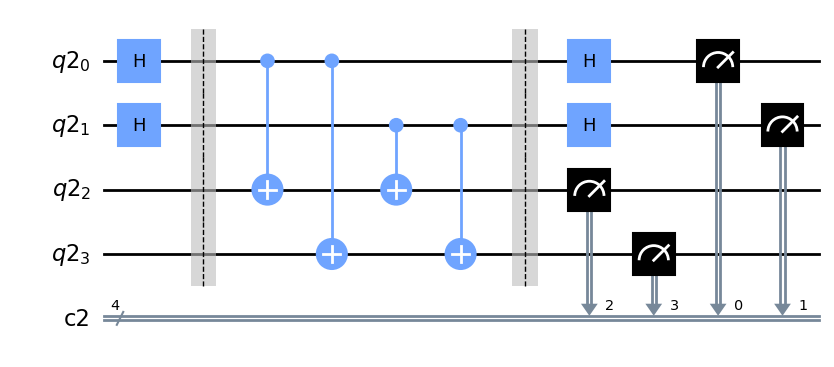

In [17]:
qc.draw(output='mpl')

In [27]:
def simon_oracle(b: str):
    """returns a Simon oracle for bitstring b"""
    b = b[::-1] # reverse b for easy iteration
    n = len(b)
    qc = QuantumCircuit(n*2)
    # Do copy; |x>|0> -> |x>|x>
    for q in range(n):
        qc.cx(q, q+n)
    if '1' not in b: 
        return qc  # 1:1 mapping, so just exit
    i = b.find('1') # index of first non-zero bit in b
    # Do |x> -> |s.x> on condition that q_i is 1
    for q in range(n):
        if b[q] == '1':
            qc.cx(i, (q)+n)
    return qc

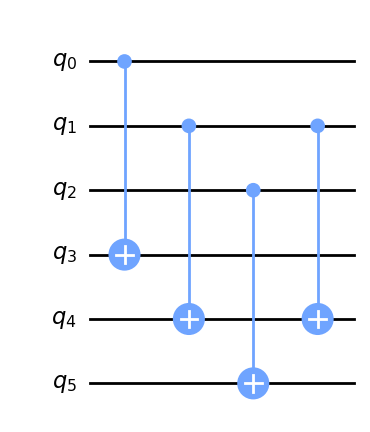

In [30]:
simon_oracle('010').draw(output='mpl')

**References**
* [Qiskit Simon's Algorithm](https://qiskit.org/textbook/ch-algorithms/simon.html)
* [Lecture by Peter Young](https://young.physics.ucsc.edu/150/simon.pdf)
* [Simon's Paper](https://epubs.siam.org/doi/10.1137/S0097539796298637)

## The Algorithms so far <a id='alg'></a>

### Deutsch-Jozsa Algorithm
* Classical computers 
    * For some inputs, it may take **exponential time** to solve with certainty.
        * Exact classical query complexity: $2^{n-1}+1$
    * However, BPP algorithms can solve de DJ problem in **polinomial time (P)**, with a **small probability of errors**.
        * Bounded error classical query complexity:$O(1)$
    
* Quantum computers
    * Solves the problem with certainty in **quantum polynomial time (QP)**.
        * Exact quantum query complexity: $1$
    
![DJ](https://qiskit.org/textbook/ch-algorithms/images/deutsch_steps.png)

### Bernstein-Vazirani Algorithm
* The goal of this algorithm was to prove **oracle separation between complexity classes BPP (bounded-error probabilistic polynomial time) and BQP (bounded-error quantum polynomial time).**
    * Exact classical query complexity: $n$
    * Bounded error classical query complexity: $\Omega(n)$
    * Exact quantum query complexity: $1$

![BV](https://qiskit.org/textbook/ch-algorithms/images/bv1.png)

### Simon's Algorithm
* The oracle separation between classes BPP and BQP, but in this case, the separation is **exponential**.
    * Bounded error classical query complexity: $\Omega(2^{n/2})$
    * Bounded error quantum query complexity: $O(n)$

![Simon](https://qiskit.org/textbook/ch-algorithms/images/simon_steps.png)

**Refs**
* [Quantum computing slides](https://www.slideserve.com/huela/csep-590tv-quantum-computing)

## 3.  C<sup>n</sup>NOT decomposition<a id='decomp'></a>

What happens if we try to run the function for a large number of variables (i.e. $f_{in}$ qubits) or a large number of clauses (i.e. $f_{out}$ qubits)?

You will find that the algorithm will have to apply multiple C<sup>n</sup>NOTs, with $n$ being the number of controls necessary to perform a NOT operation on the target qubit. Therefore, there are not only more $f_in$ and $f_out$ qubits  but also more auxiliary qubits (for decomposition).

Admit the following decomposition scheme for a C<sup>n</sup>NOT gate:

<img src="https://www.researchgate.net/profile/Peter-Russer/publication/225931473/figure/fig2/AS:383053693243397@1468338525711/Decomposition-of-the-multiply-controlled-NOT-gate-C-k-X-into-2-k-1-TOFFOLI-gates_W640.jpg" width="500 px" align="center">


<div class="alert alert-block alert-warning">

**Exercise 4.2 - C<sup>n</sup>NOT decomposition**

&nbsp;

From the scheme above, build a function `cn_not` to decompose a C<sup>n</sup>NOT with an arbitrary number of controls into Toffoli and CNOT gates. 

The function should take as arguments the quantum circuit, **a list of control qubits** (this is different from a qubit register), a target qubit, and a register of auxiliary qubits.

</div>

In [22]:
def cn_not(circuit, ctrls, trg, aux):
    num_auxs = len(aux)

    for i in range(num_auxs):
        if i == 0:
            circuit.ccx(ctrls[0], ctrls[1], aux[i])
        else:
            circuit.ccx(aux[i-1], ctrls[i+1], aux[i])

    circuit.cx(aux[num_auxs-1], trg)

    for i in range(num_auxs-1, -1, -1):
        if i == 0:
            circuit.ccx(ctrls[0], ctrls[1], aux[i])
        else:
            circuit.ccx(aux[i-1], ctrls[i+1], aux[i])


<div class="alert alert-block alert-warning">

We can test the function - let's admit that controls are contained in a single quantum register:
    
</div>

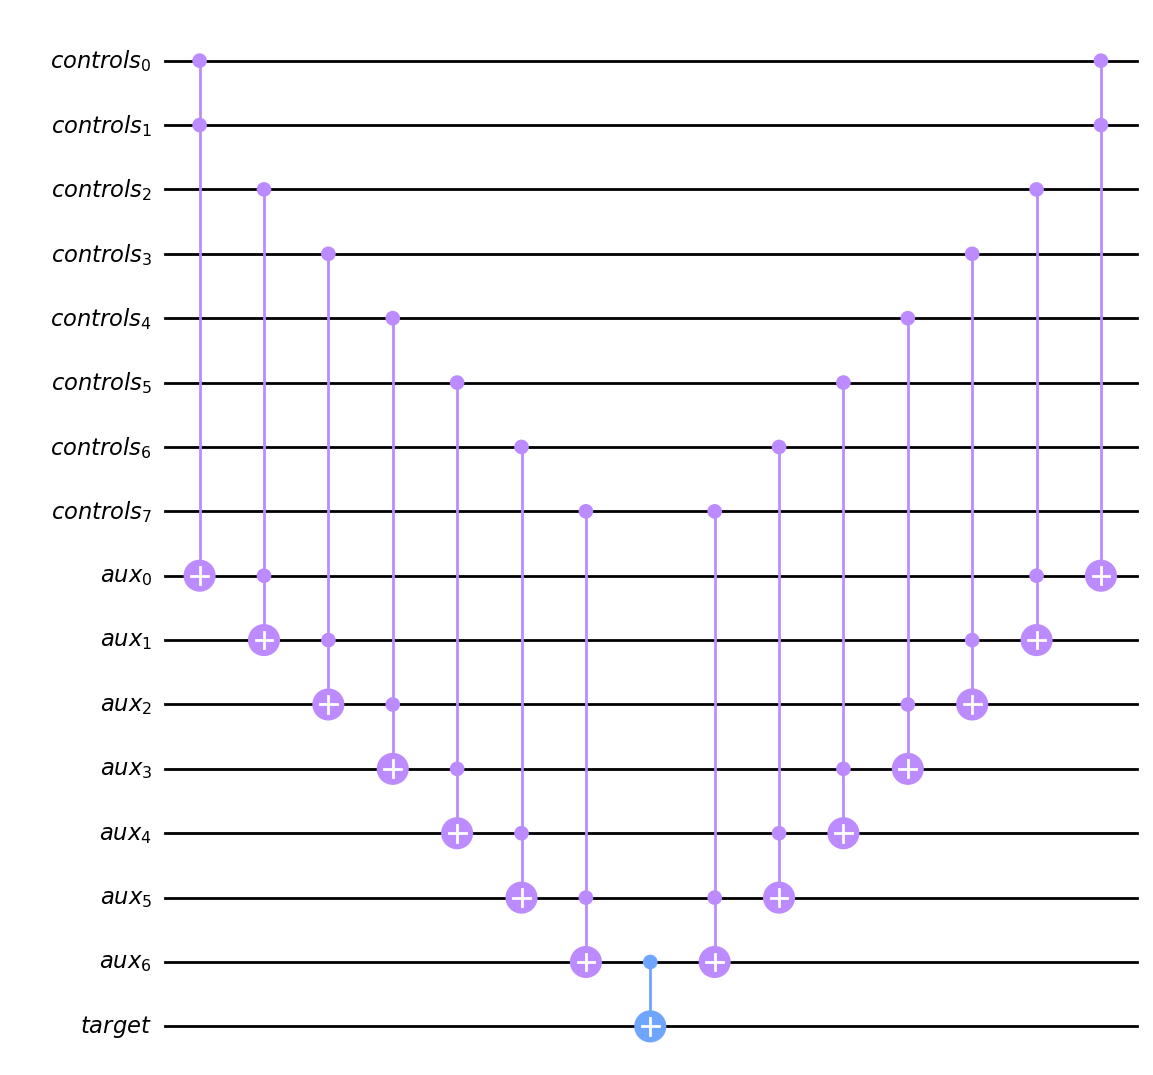

In [25]:
# Number of controls
n=8

controls=QuantumRegister(n, 'controls')
aux=QuantumRegister(n-1, 'aux')
trg=QuantumRegister(1, 'target')
qc=QuantumCircuit(controls, aux, trg)

control_list = []
for i in range(n):
    control_list.append(controls[i])

cn_not(qc, control_list, trg, aux)

qc.draw(output='mpl')

In [ ]:
# Number of controls
n=8

controls=QuantumRegister(n, 'controls')
aux=QuantumRegister(n-1, 'aux')
trg=QuantumRegister(1, 'target')
qc=QuantumCircuit(controls, aux, trg)

control_list = []

    pass

for i in range(n):
    control_list.append(controls[i])
    
cn_not(qc, control_list, trg, aux)

qc.draw(output='mpl')

**Refs**

1. "[Quantum computing algorithm for electromagnetic field simulation](https://www.researchgate.net/publication/225931473_Quantum_computing_algorithm_for_electromagnetic_field_simulation)"